# Holiday Package Purchase Data Analysis

## About Dataset

Context
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

Content
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

Most important features that have an impact on Product taken: Designation, Passport, Tier City, Martial status, occupation
Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.
Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.

The dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

%matplotlib inline


In [3]:
df = pd.read_csv("..\\data\\Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning

1. Handling Missing Values
2. Handling Duplicates
3. Check Data Type
4. Understand the Dataset

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
### Checking all categories
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [7]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [8]:
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [9]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [10]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [11]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [12]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [13]:
## Checking features with the Missing Values 
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,":",np.round(df[feature].isnull().mean()*100,5)) # Percantage of missing values by features


Age : 4.62357
TypeofContact : 0.51146
DurationOfPitch : 5.13502
NumberOfFollowups : 0.92062
PreferredPropertyStar : 0.53191
NumberOfTrips : 2.86416
NumberOfChildrenVisiting : 1.35025
MonthlyIncome : 4.76678


In [14]:
## Statistics on numerical columns with the missing values
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null Values

1. Age with median
2. Type of contact with mode
3. Duration of pitch with median
4. Number of followups with mode
5. Preffered Property Star with mode
6. Number of trips with Median
7. Monthly income with median
8. Number of children visiting with mode

In [15]:
## Age
df.Age.fillna(df.Age.median(), inplace=True)

## TypeofContact
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

## DurationofPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

## NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

## PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

## NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

## MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

## NumberofChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

In [16]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [17]:
## Dropping CustomerID
df.drop('CustomerID', inplace=True, axis=1)

In [18]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Feature Engineering

In [19]:
## Creating column Total Visit combining number of person visiting and children visiting
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting', 'NumberOfPersonVisiting'], inplace=True, axis=1)

In [20]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [21]:
## Number of Numeric Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O' ]
print('Number of Numerical features: ',len(num_features))

Number of Numerical features:  12


In [22]:
## Number of Categorical Features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O' ]
print('Number of Categorical features: ',len(cat_features))

Number of Categorical features:  6


In [23]:
## Number of Discrete Features
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25 ]
print('Number of Discrete features: ',len(discrete_features))

Number of Discrete features:  9


In [24]:
## Number of Continous Features
continous_features = [feature for feature in num_features if feature not in discrete_features ]
print('Number of Continous features: ',len(continous_features))

Number of Continous features:  3


## Data Visualization

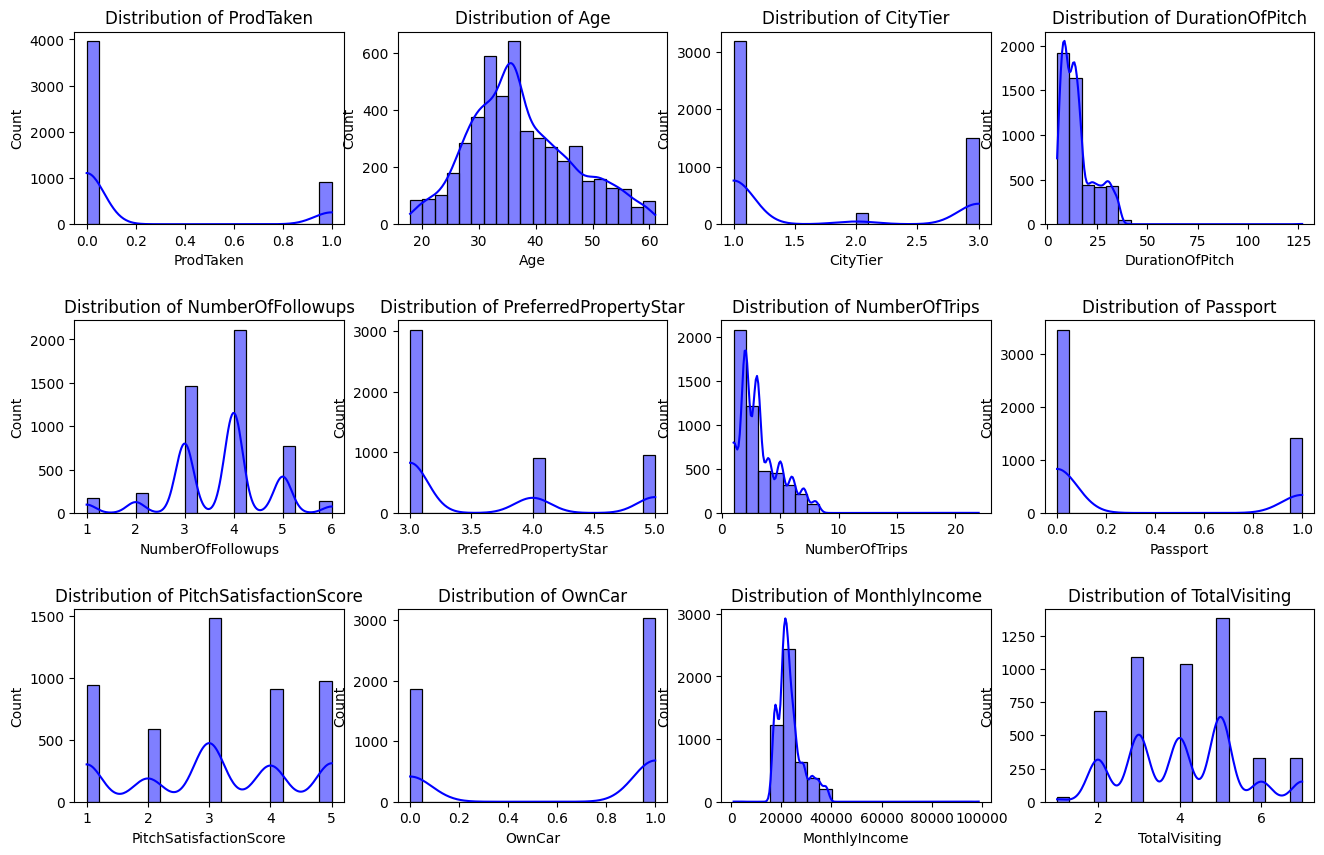

In [25]:
plt.figure(figsize=(16,10))
i=1
for col in num_features:
    plt.subplot(3,4,i)
    i += 1
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {col}")

plt.subplots_adjust(hspace=0.5)    
plt.show()

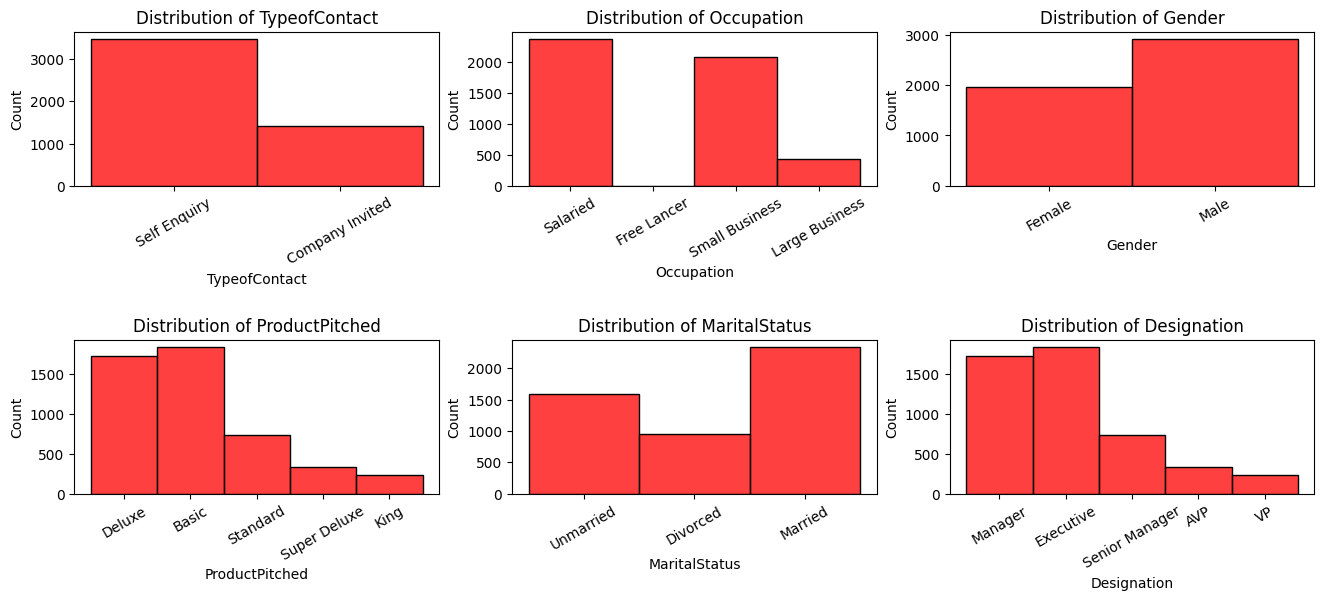

In [26]:
plt.figure(figsize=(16,10))
i=1
for col in cat_features:
    plt.subplot(3,3,i)
    i += 1
    sns.histplot(df[col], bins=20, color='red')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=30)

plt.subplots_adjust(hspace=1)    
plt.show()

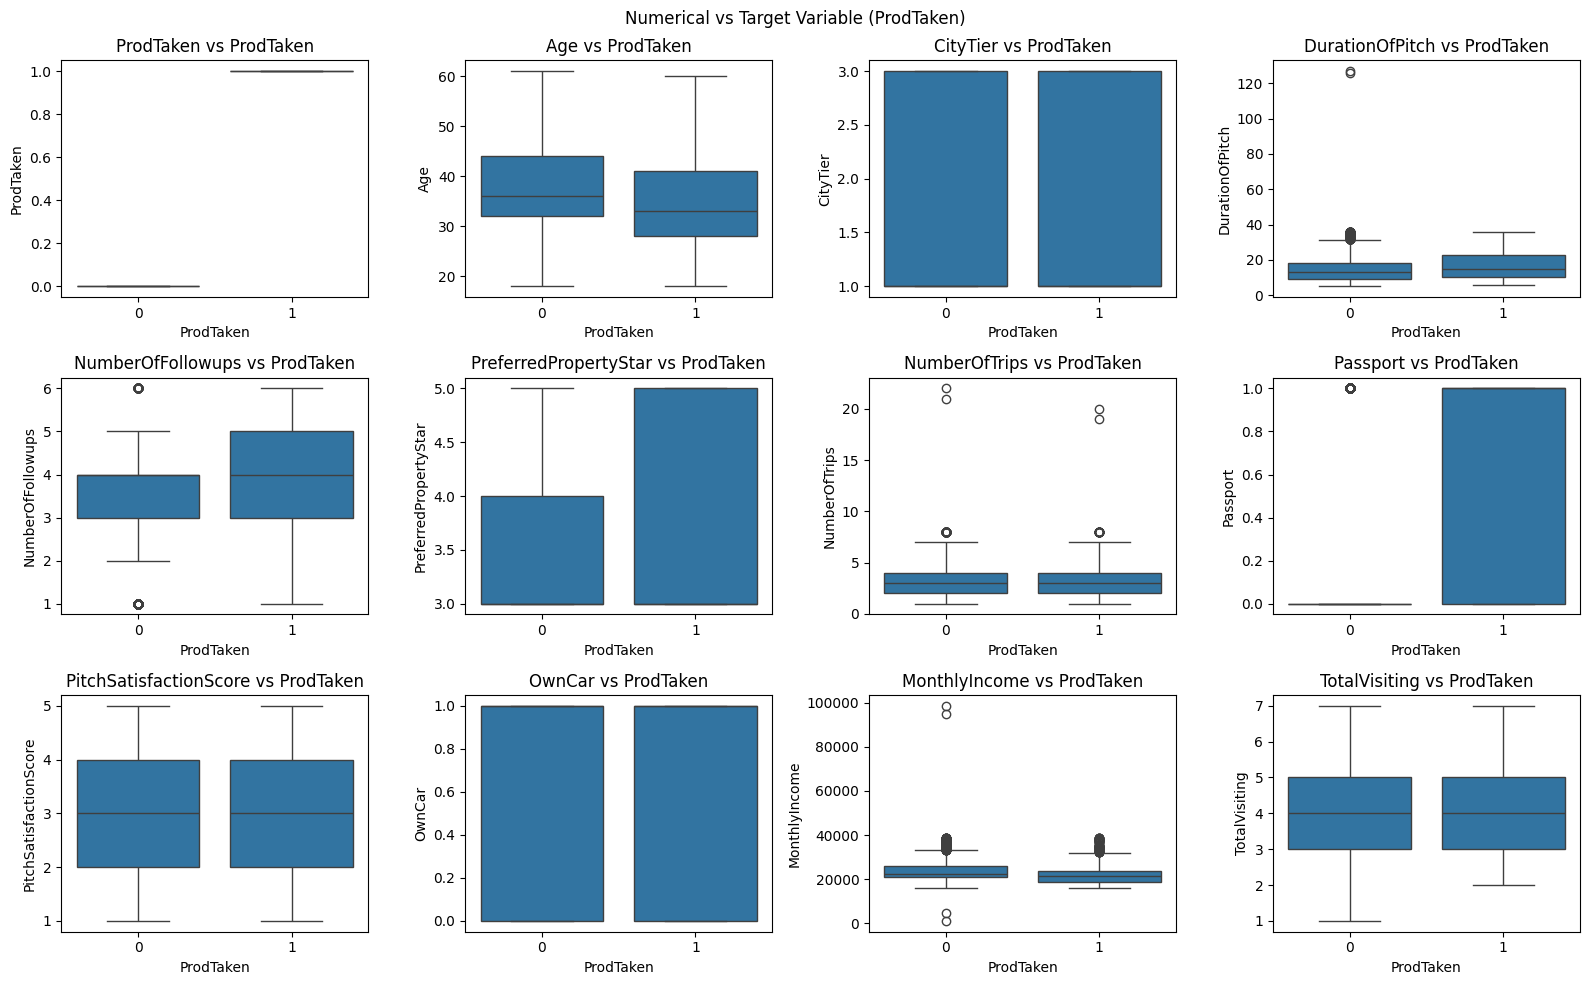

In [27]:
plt.figure(figsize=(16,10))
i=1
for col in num_features:
    plt.subplot(3,4,i)
    i += 1
    sns.boxplot(x='ProdTaken', y=col, data=df)
    plt.title(f"{col} vs ProdTaken")
    
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Numerical vs Target Variable (ProdTaken)")
plt.tight_layout()
plt.show()

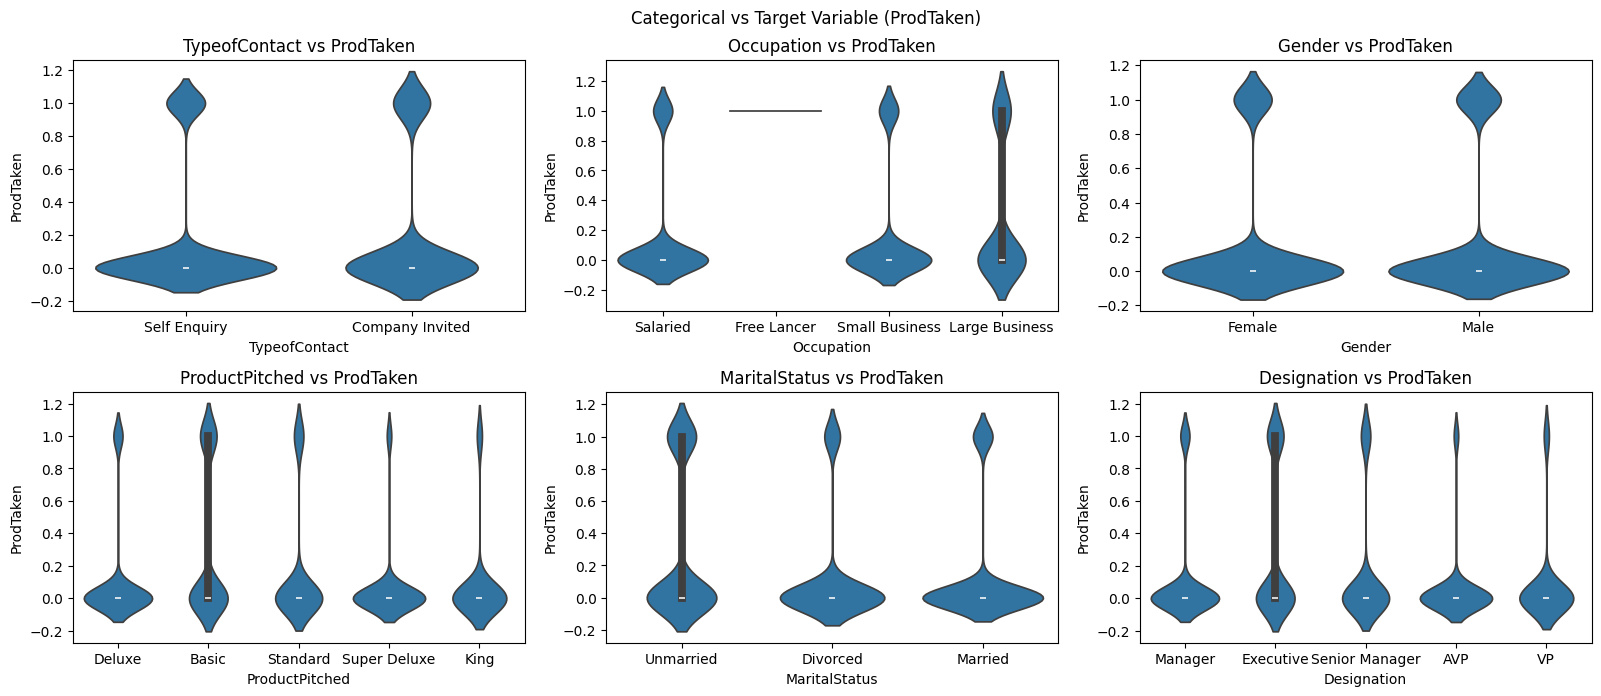

In [28]:
plt.figure(figsize=(16,10))
i=1
for col in cat_features:
    plt.subplot(3,3,i)
    i += 1
    sns.violinplot(y='ProdTaken', x=col, data=df)
    plt.title(f"{col} vs ProdTaken")
    
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Categorical vs Target Variable (ProdTaken)")
plt.tight_layout()
plt.show()

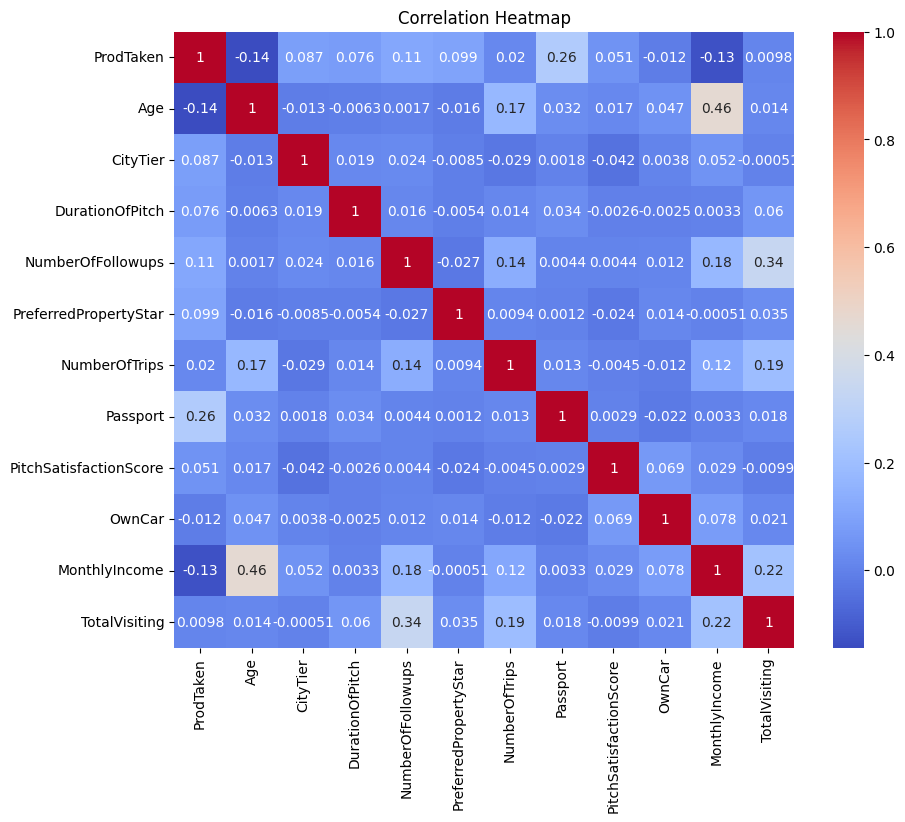

In [29]:
plt.figure(figsize=(10, 8))
correlation = df[num_features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

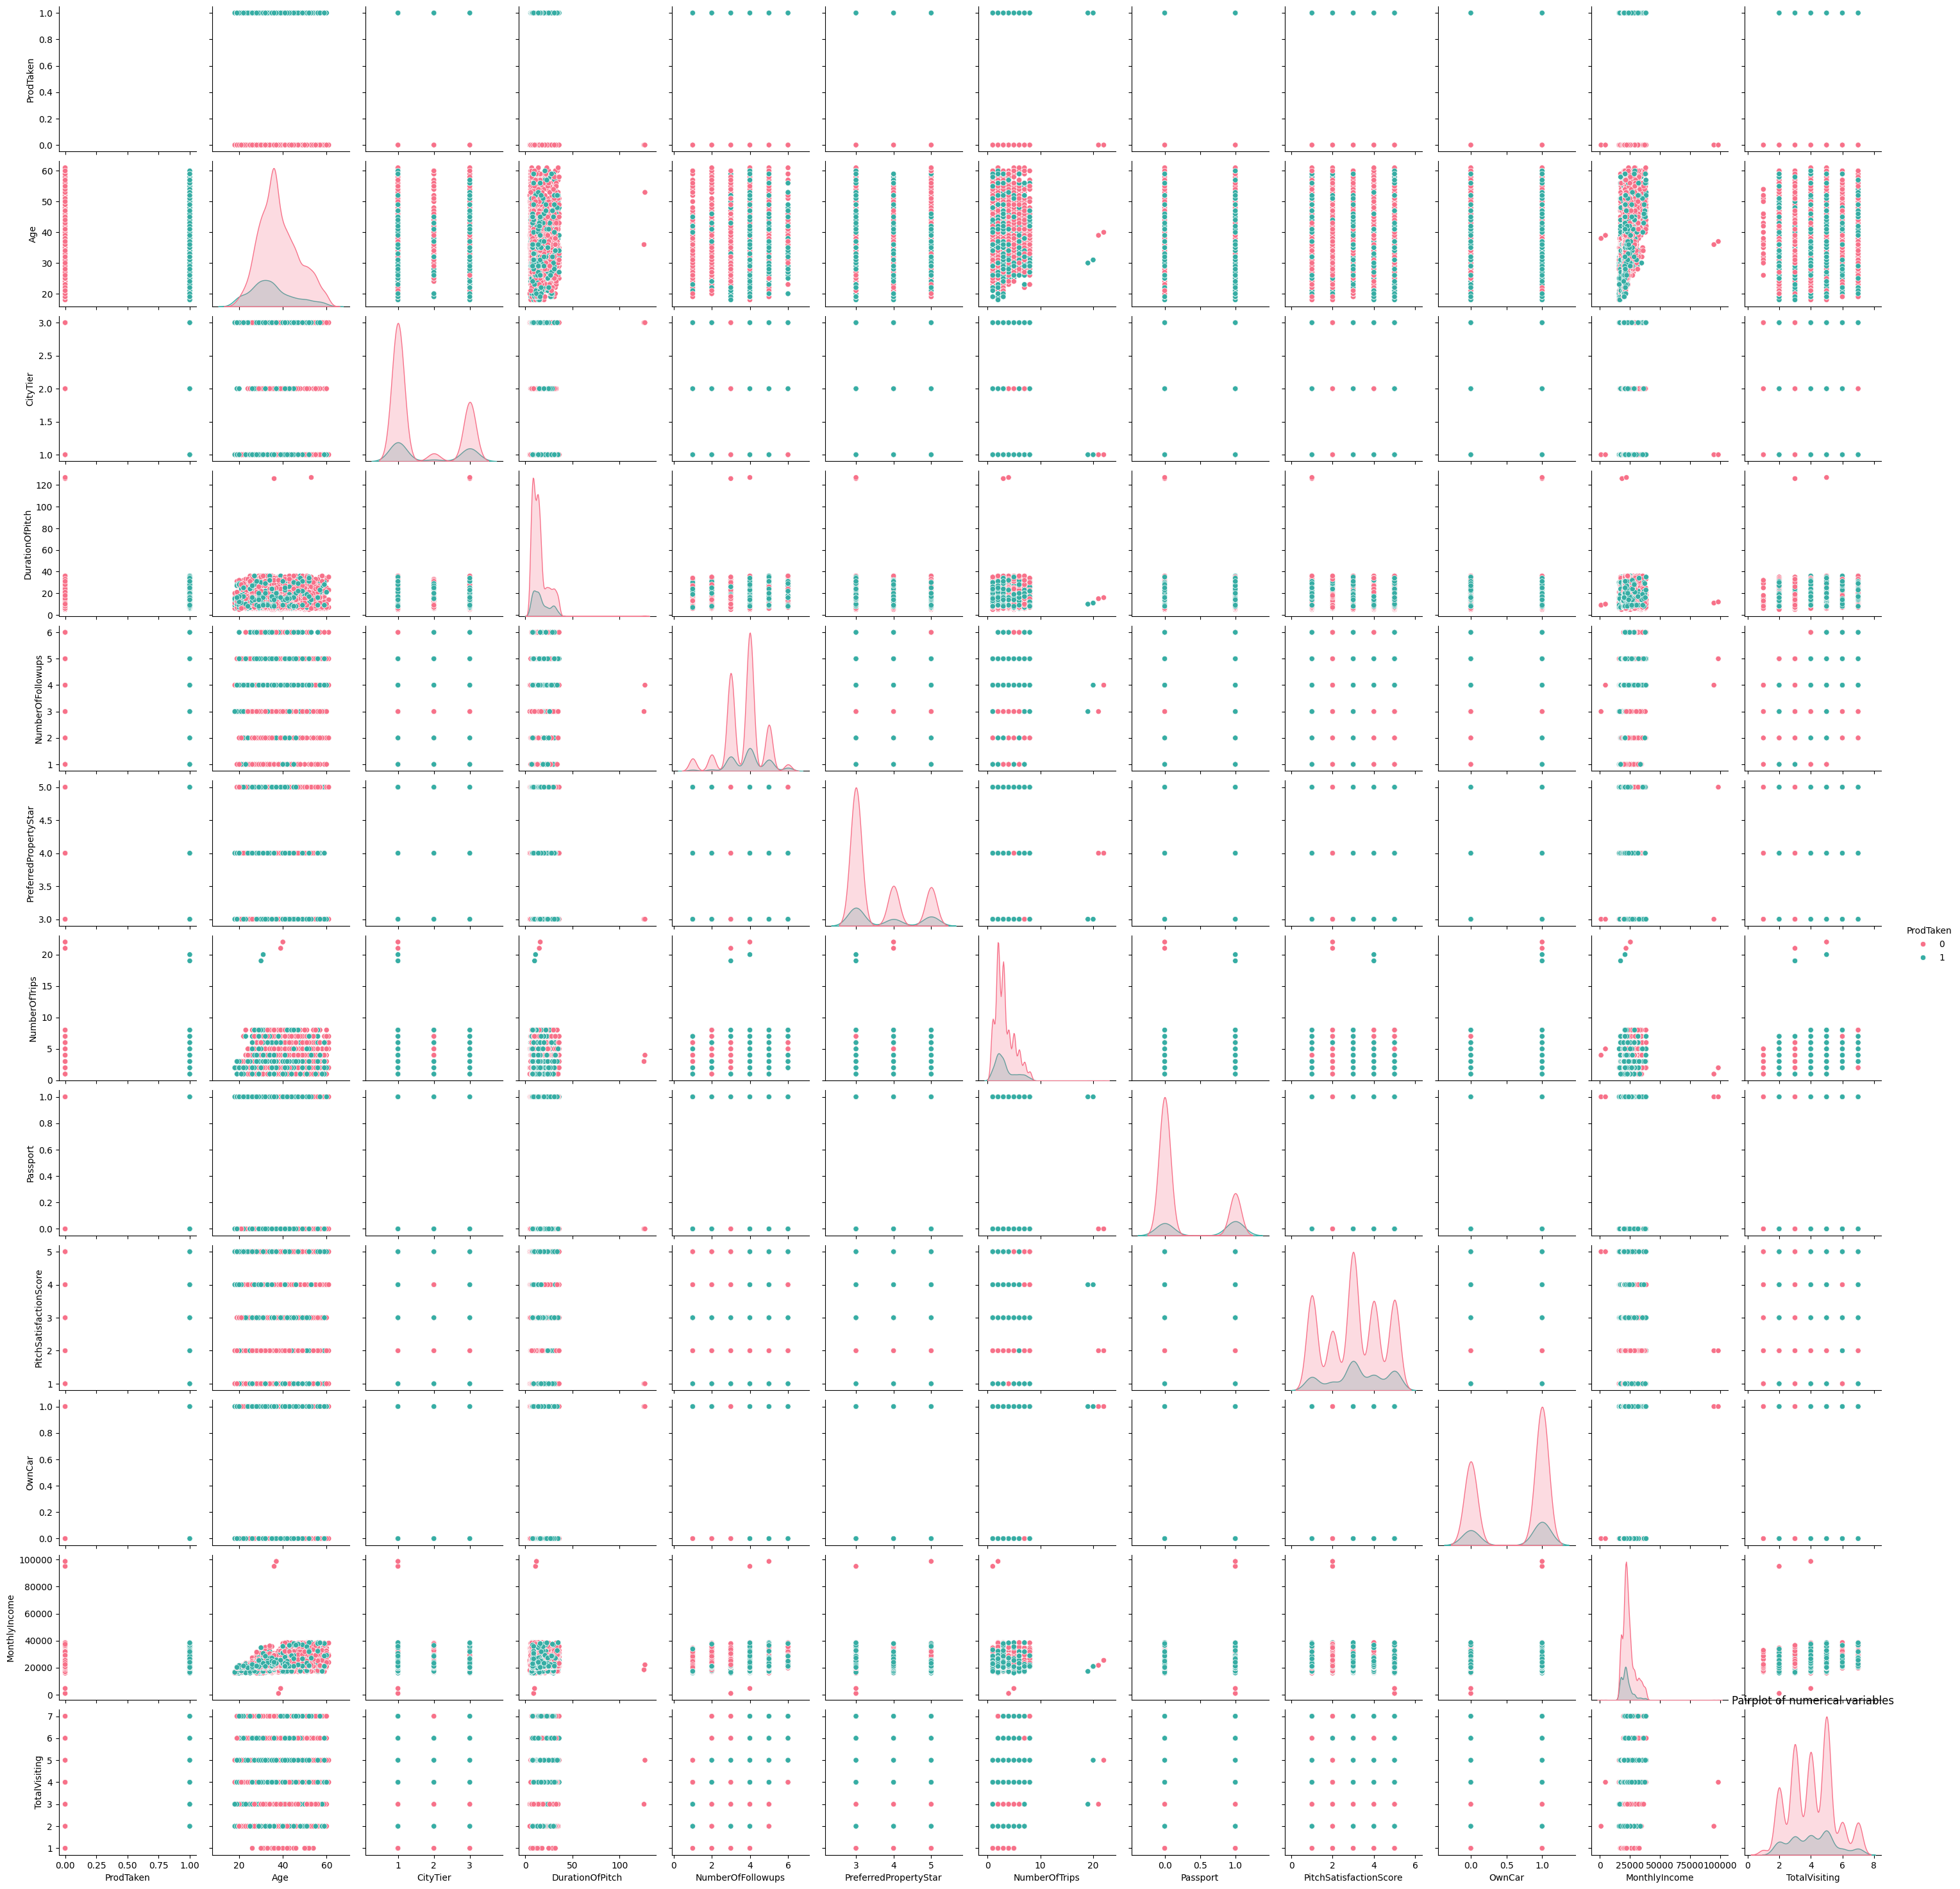

In [30]:
sns.pairplot(df, vars=num_features, hue='ProdTaken', palette='husl')
plt.title("Pairplot of numerical variables")
plt.show()

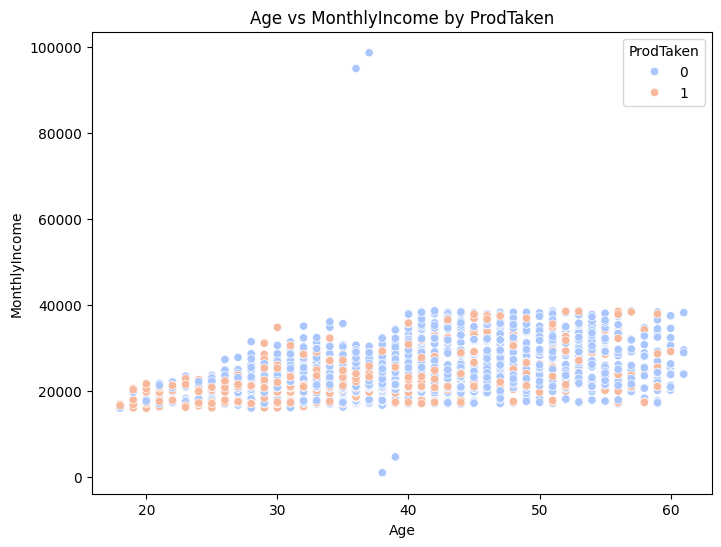

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', hue='ProdTaken', data=df, palette='coolwarm')
plt.title("Age vs MonthlyIncome by ProdTaken")
plt.show()

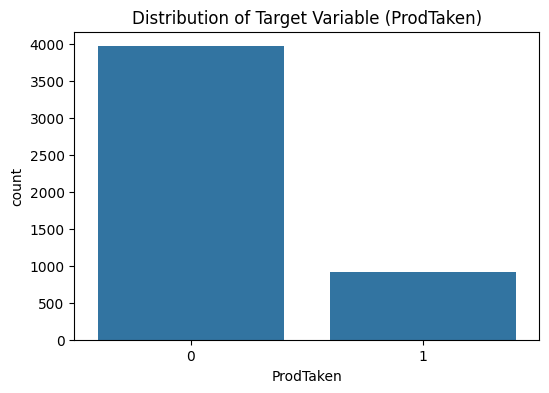

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='ProdTaken')
plt.title("Distribution of Target Variable (ProdTaken)")
plt.show()

In [37]:
segment = df.groupby(['Designation', 'Passport', 'CityTier', 'MaritalStatus'])['ProdTaken'].mean().reset_index()
segment.sort_values(by='ProdTaken', ascending=False).head()

,Designation,Passport,CityTier,MaritalStatus,ProdTaken
14,AVP,1,3,Unmarried,1.000000
60,Senior Manager,1,2,Married,1.000000
30,Executive,1,3,Unmarried,0.846154
26,Executive,1,1,Unmarried,0.703704
29,Executive,1,3,Married,0.666667


### Hypothesis Testing: T-test Results for Age

#### Objective:
To determine if there is a significant difference in the average age of customers who purchased the product (`ProdTaken = 1`) versus those who did not (`ProdTaken = 0`).

In [39]:
takers = df[df['ProdTaken'] == 1]['Age']
non_takers = df[df['ProdTaken'] == 0]['Age']
t_stat, p_val = ttest_ind(takers, non_takers, nan_policy='omit')
print(f"T-test for Age: t-stat={t_stat:.2f}, p-value={p_val:.2e}")

T-test for Age: t-stat=-10.15, p-value=5.51e-24




#### Results:
- **T-statistic:** -10.15  
- **P-value:** 5.51e-24  

#### Interpretation:
1. **Statistical Significance:**
   - The p-value (5.51e-24) is far less than the commonly used significance level (e.g., 0.05), indicating that the difference in the mean age between the two groups is statistically significant.
   
2. **Direction of the Difference:**
   - The negative t-statistic (-10.15) suggests that the average age of customers who purchased the product is lower than those who did not.

#### Business Insight:
- Younger customers are more likely to purchase the product.
- Marketing efforts could focus on targeting the younger demographic to maximize conversions.

### Hypothesis Testing: Chi-Square Test for Marital Status and Product Purchase

#### Objective:
To determine if there is a significant association between customers' marital status (MaritalStatus) and whether they purchased the product (ProdTaken).

In [47]:
contingency_table = pd.crosstab(df['MaritalStatus'], df['ProdTaken'])
print(contingency_table,"\n")
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(expected,"\n")

print(f"Chi-Square Test for MaritalStatus: chi2-stat= {chi2_stat:.2f}, p-value={p_val:.2e}")


ProdTaken         0    1
MaritalStatus           
Divorced        826  124
Married        2014  326
Unmarried      1128  470 

[[ 771.19476268  178.80523732]
 [1899.57446809  440.42553191]
 [1297.23076923  300.76923077]] 

Chi-Square Test for MaritalStatus: chi2-stat= 174.61, p-value=1.21e-38


#### Results:
- **Chi-Square Statistic:** 174.61
- **P-value:** 1.21e-38

#### Interpretation:
1. **Statistical Significance:**

The p-value (1.21e-38) is compared to the significance level (e.g., 0.05). If the p-value is smaller than the significance level, we reject the null hypothesis and conclude that there is a significant association between the variables.
Effect Size:

The chi-square statistic (174.61) measures the magnitude of the association between the two categorical variables. A larger value indicates a stronger association.

#### Business Insight:
If a significant association is found, the business could consider how the variables interact. For example, if there’s an association between gender and product purchase, targeted marketing strategies could be adjusted accordingly.

In [49]:
## Saving cleaned csv file
df.to_csv('..\\data\\cleaned_travel.csv', index=False)